In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [223]:
dataset = load_iris()

In [224]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [225]:
df = sns.load_dataset('iris')

In [226]:
X = df.iloc[:,:-1]
y = dataset.target

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [229]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [231]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

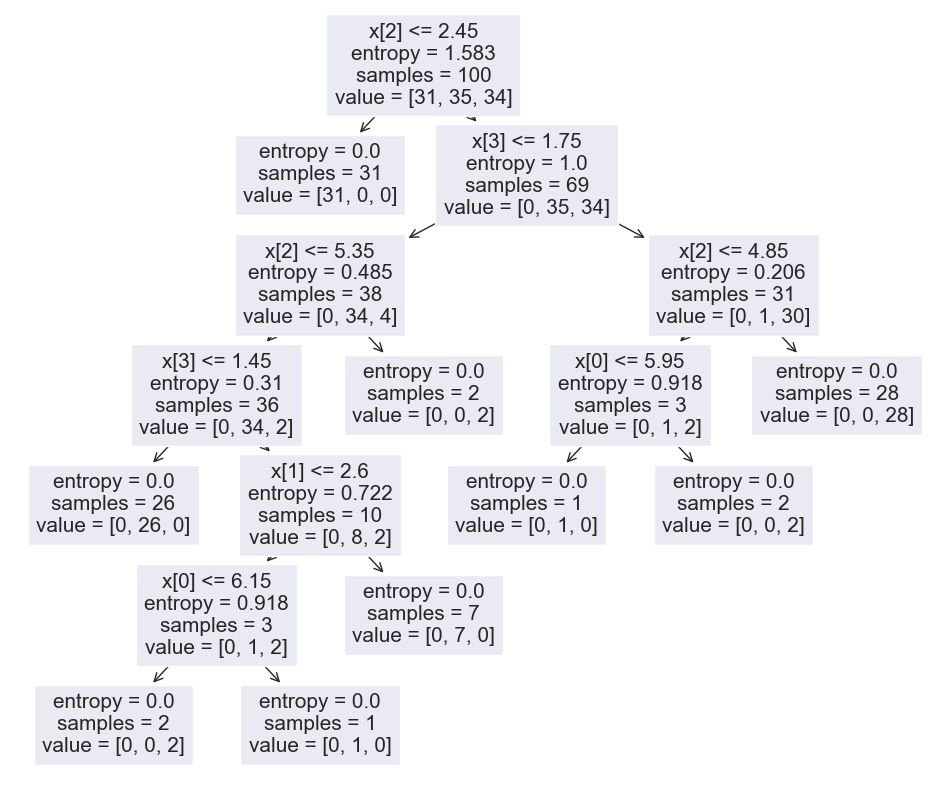

In [232]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier)

In [233]:
y_train_pred = classifier.predict(X_train)

In [234]:
from sklearn.metrics import accuracy_score, classification_report

In [235]:
accuracy_score(y_train, y_train_pred)

1.0

In [236]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [237]:
y_test_pred =classifier.predict(X_test)

In [238]:
accuracy_score(y_test,y_test_pred)

0.98

POST PRUNING
After creating the decision tree then adjusting the depth in order to prevnet overfitting

In [239]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=  2)

In [240]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

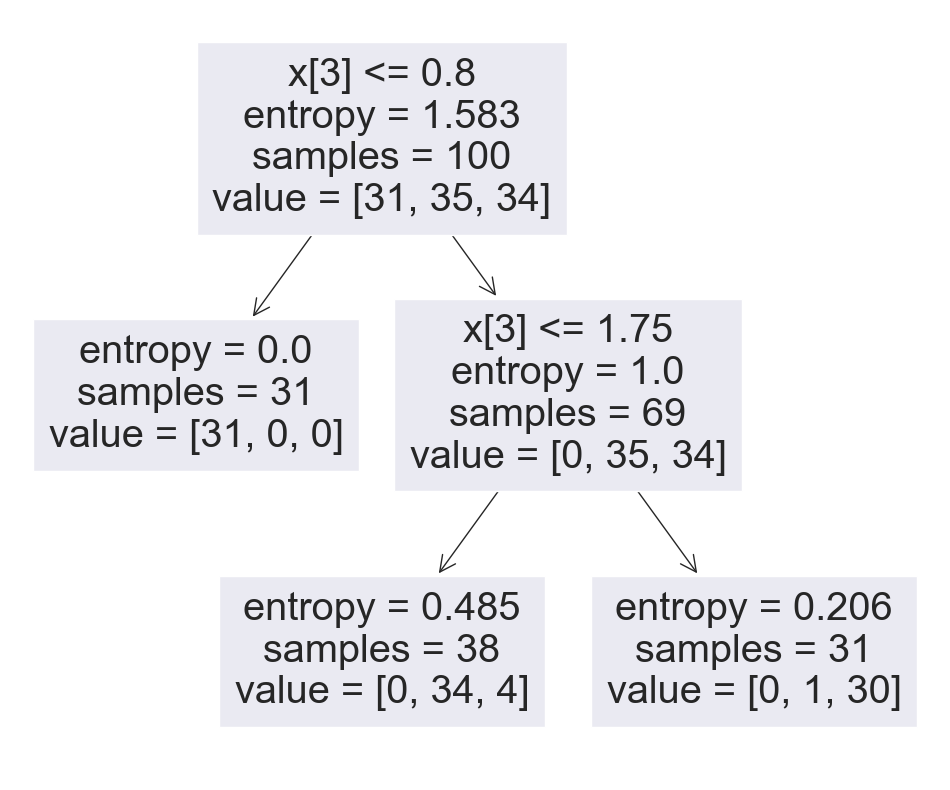

In [241]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier)

In [242]:
X_test.shape

(50, 4)

In [243]:
train_pred = classifier.predict(X_train)

In [244]:
accuracy_score(y_train, train_pred)

0.95

In [245]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.97      0.93        35
           2       0.97      0.88      0.92        34

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [246]:
test_pred = classifier.predict(X_test)

In [247]:
accuracy_score(y_test, test_pred)

0.98

In [248]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Pre PRUNING MODEL
before creating the decision tree we will perform hyperparameter tuning and the create decison tree


In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
calassifier = DecisionTreeClassifier()

In [251]:
parameters ={
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': [2,3,4,5],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto','sqrt', 'log2']
}

In [252]:
clf = GridSearchCV(classifier, param_grid=parameters,cv=5,scoring='accuracy')

In [253]:
clf.fit(X_train,y_train)

/Users/abhishekwaghchaure/opt/anaconda3/envs/main1/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/abhishekwaghchaure/opt/anaconda3/envs/main1/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/abhishekwaghchaure/opt/anaconda3/envs/main1/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/abhishekwaghchaure/opt/anaconda3/envs/main1/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [254]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [255]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=2,max_features='log2',splitter= 'best')

In [256]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='log2')

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

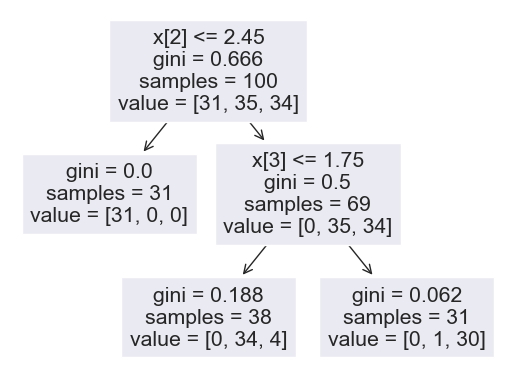

In [257]:
tree.plot_tree(classifier)

In [258]:
pred_train = classifier.predict(X_train)

In [259]:
accuracy_score(y_train, pred_train)

0.95

In [261]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.97      0.93        35
           2       0.97      0.88      0.92        34

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [263]:
pred_test = classifier.predict(X_test)

In [264]:
accuracy_score(y_test,pred_test)

0.98

In [265]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

